# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [4]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [5]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [6]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 60


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)

In [8]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[0.5543, 0.8356, 0.7458, 0.4672, 0.3198, 0.5000, 0.4665, 0.8648, 0.1485,
         0.7409]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [10]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [11]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    #For do dataloader (minibatch)
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [12]:
print('Final loss:', loss.data)

Final loss: tensor(0.3282)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

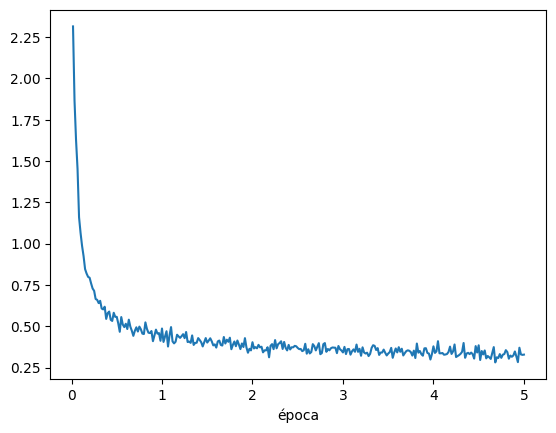

In [13]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

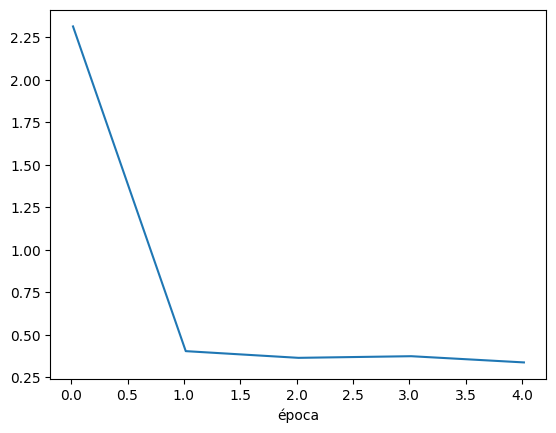

In [14]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

R.: 1000

2. Em uma época, quantos mini-batches existem?

R.: 60

3. Qual é a definição de época?

R.: Época é um ciclo completo dentro de um conjunto de dados. Pode ser ele dentro do conjunto todo, como dentro de batches.



## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [18]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    #For do dataloader (minibatch)
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
    print(f'Época {i+1}/{n_epochs}, Batch: {(k+1)}')


Época 1/5, Batch: 59
Época 2/5, Batch: 118
Época 3/5, Batch: 177
Época 4/5, Batch: 236
Época 5/5, Batch: 295


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [31]:
batch_size = 100

dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())


loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

x_train, y_train = next(iter(loader_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    #For do dataloader (minibatch)
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

Text(0.5, 0, 'época')

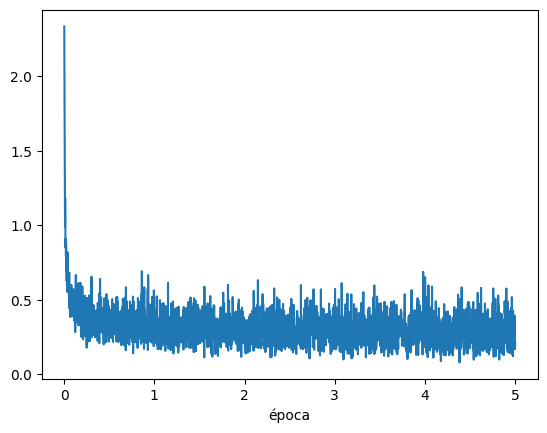

In [32]:
# Visualizando gráfico de perda durante o treinamento
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

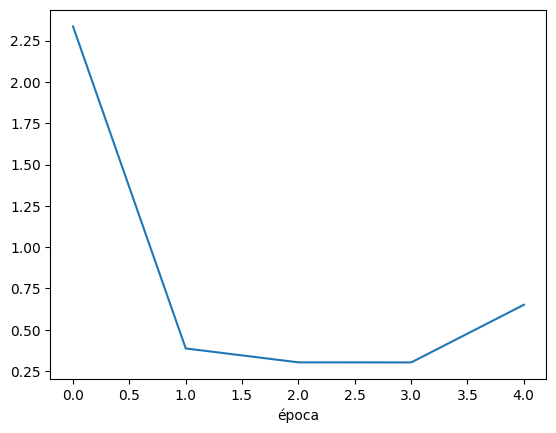

In [33]:
#Visualização usual da perda, somente no final de cada minibatch
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Batch = 500

In [36]:
batch_size = 500

dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())


loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

x_train, y_train = next(iter(loader_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    #For do dataloader (minibatch)
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

Text(0.5, 0, 'época')

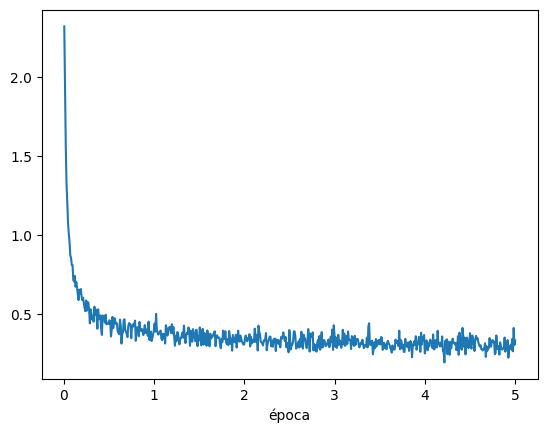

In [37]:
# Visualizando gráfico de perda durante o treinamento
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

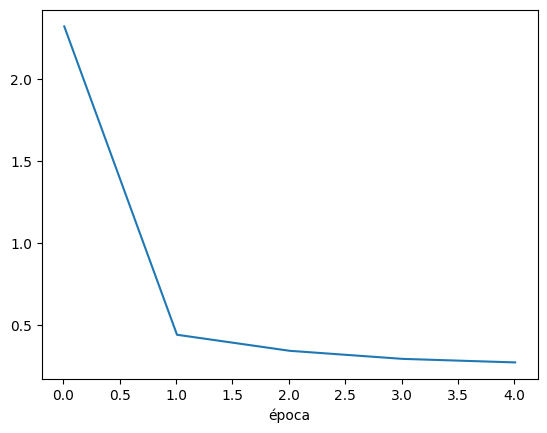

In [38]:
#Visualização usual da perda, somente no final de cada minibatch
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

## Conclusões sobre os experimentos deste notebook


Podemos perceber que quanto menor o batch, a variação dentro de uma época é muito maior. Já com batch maior, a variação fica menor.

Quando o batch é menor, o loop para calcular os pesos fica mais "curto", causando a maior variação na perda, já com o batch maior, ele fica mais tempo no loop recalculando os pesos e consequentemente causando uma menor variação na perda.